In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
X = np.loadtxt('bm.csv', delimiter=',', dtype='float64', usecols=(0,1))
y = np.loadtxt('bm.csv', delimiter=',', dtype='float64', usecols=2)

In [18]:
n_s = 5000
np.random.seed(7)
r=np.random.permutation(len(y))
X, y = X[r,:], y[ r]
X_s, y_s= X[: n_s , :] , y[: n_s ]

In [19]:
y_s.shape

(5000,)

In [20]:
from sklearn import svm
ksvm = svm.SVC(kernel='rbf',
               gamma=0.5,
               C=20.0)
score = ksvm.fit(X_s, y_s).score(X_s, y_s)
print(1 - score)

0.010199999999999987


In [23]:
def plot_decision_boundary_contour(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    # plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

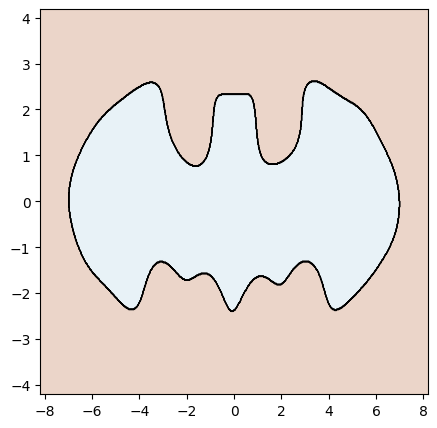

In [24]:
plot_decision_boundary_contour(ksvm, X_s, y_s)